# Multi-Linear Regression on Insurance Data

* Exploratory Data Analysis (EDA)
* Feature engineering
* Feature Selection
* Model Building and validation

In [3]:
from sklearn.linear_model import LinearRegression
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exploratory DATA ANALYSIS (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [14]:
#categorical columns 
col_cat = df.select_dtypes(exclude=['int',float]).columns
print(col_cat)

Index(['sex', 'smoker', 'region'], dtype='object')


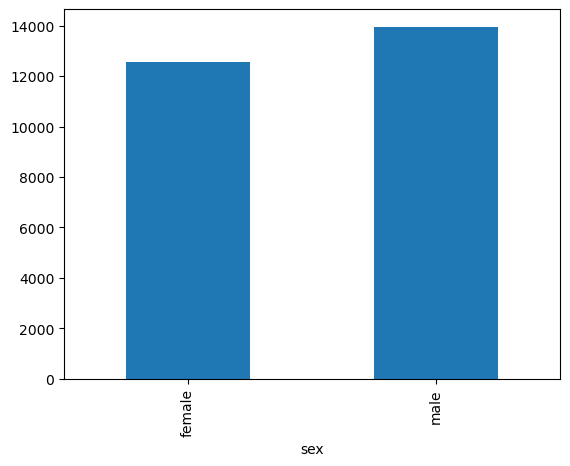

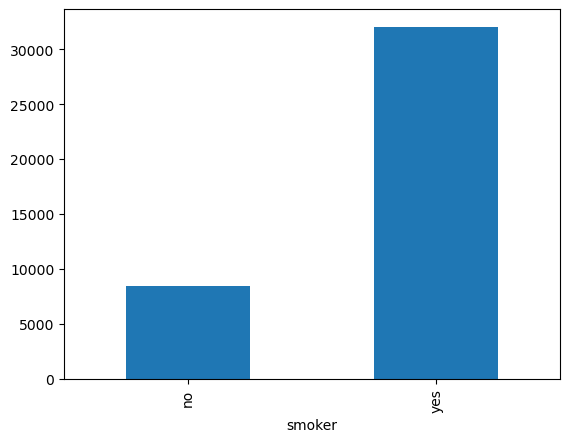

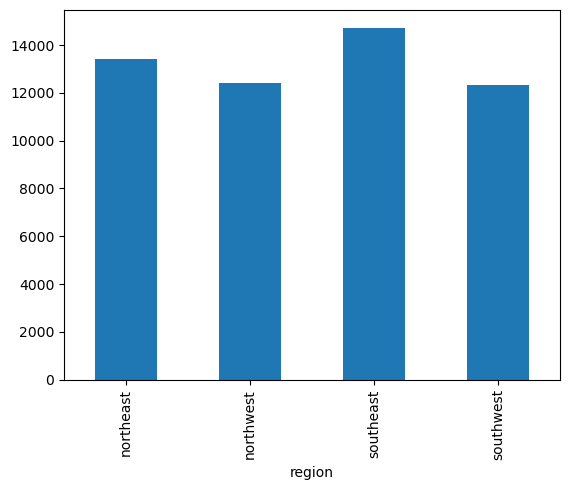

In [16]:
for cat in col_cat :
    if cat != 'charges':
        df.groupby([cat])['charges'].mean().plot.bar()
        plt.show()
        

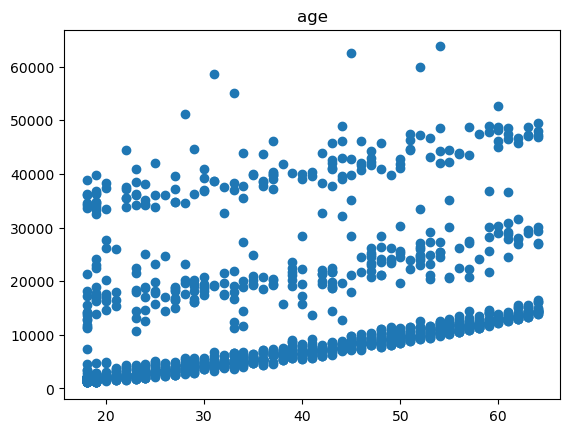

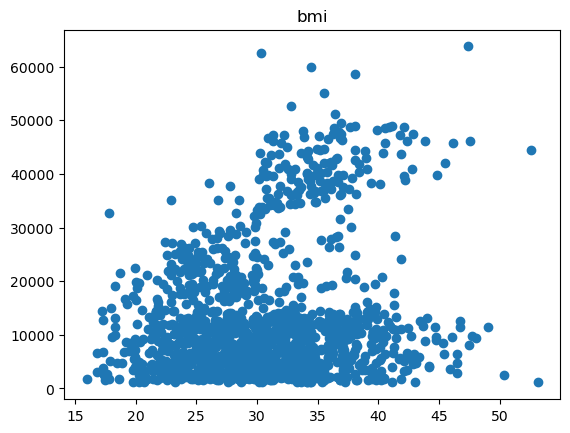

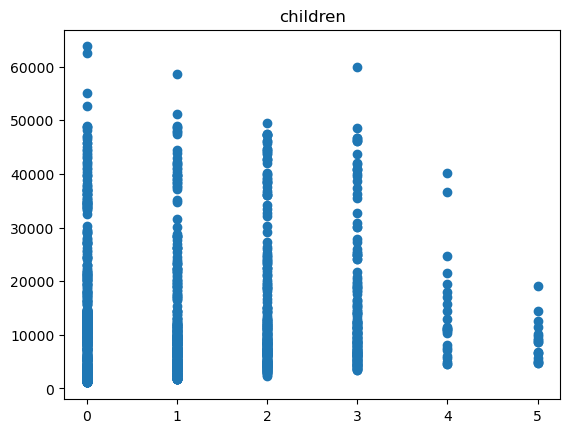

In [20]:
col_num  =  df.select_dtypes(exclude=['object']).columns
for num in col_num :
    if num != 'charges':
        plt.scatter(df[num],df['charges'])
        plt.title(num)
        plt.show()

## Distribution of Data
* Here we check either or not our data is distributed symertically because linear Regression Model assumes that the input data is symmetrically distributed
* if it is not symetrical we need to perform a scalling (handling skewness)

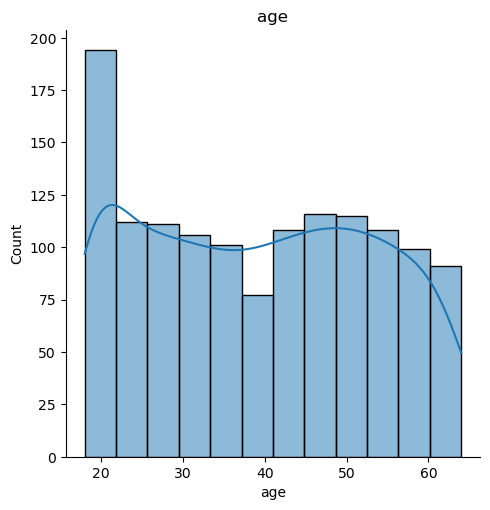

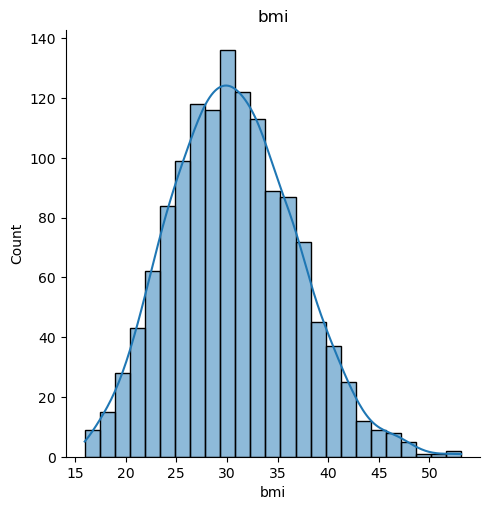

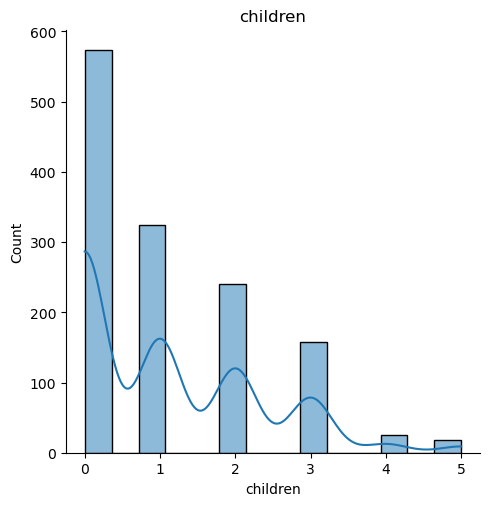

In [24]:
for k in col_num:
    if k != 'charges':
        sns.displot(df[k], kde=True)
        plt.title(k)
        plt.show()
    

 *  check for outliers => Box plot 

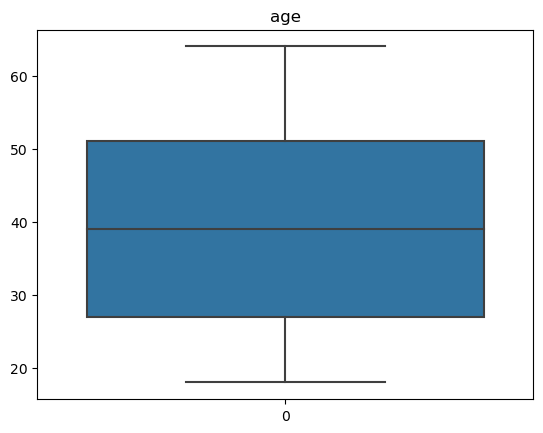

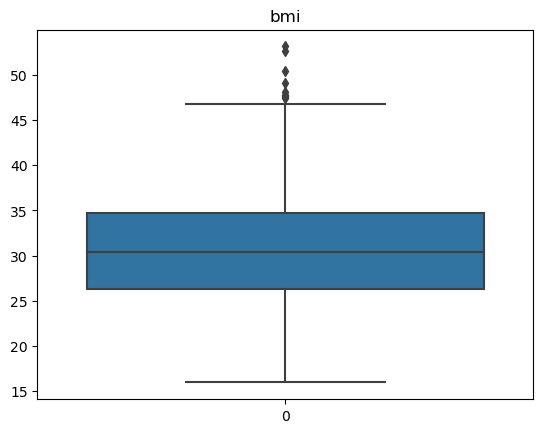

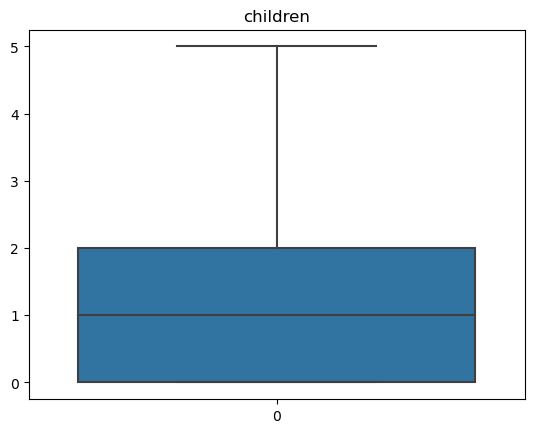

In [27]:
for k in col_num:
    if k != 'charges':
        sns.boxplot(df[k])
        plt.title(k)
        plt.show()
    

## Feature Engineering

- in Feature Engineering we try to do label encoding for categorical data [ sex , smoker , region]
- feature scaling (normalising the data and handle outliers)

In [29]:
#show categorical data values 
df[col_cat].head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [30]:
data = df.copy()

In [34]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [42]:
for index, value in enumerate(data['region'].unique(), 0):
    print(index, value)

0 southwest
1 southeast
2 northwest
3 northeast


In [45]:
ordinal = {value:index for index,value in enumerate(data['region'].unique(),0)}
ordinal

{'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}

In [46]:
data['sex']=np.where(data['sex']=='male',1,0)
data['smoker']=np.where(data['smoker']=='yes',1,0)
ordinal = {value:index for index,value in enumerate(data['region'].unique(),0)}
data['region']=data['region'].map(ordinal)
data[col_cat].head()

,sex,smoker,region
0,0,1,0
1,1,0,1
2,1,0,1
3,1,0,2
4,1,0,2


## Feature Selection 
    - in order to improve the model performance, we need to select only the features whit high relation-ship with the target variable 
    - we should nevel put all the columns at one time in order to predict the target variable
    - we usee chi2 if the input is cat and the output is continus
    - then perfom correlation btw continus input and continus output

In [47]:
from sklearn.feature_selection import chi2

In [48]:
feat_cat = data.drop(col_num,axis=1)

In [50]:
feat_cat

,sex,smoker,region
0,0,1,0
1,1,0,1
2,1,0,1
3,1,0,2
4,1,0,2
...,...,...,...
1333,1,0,2
1334,0,0,3
1335,0,0,1
1336,0,0,0


In [52]:
# assuming the the number of children is a categorical feature
feat_cat['children']=data['children'].values

In [53]:
feat_cat

,sex,smoker,region,children
0,0,1,0,0
1,1,0,1,1
2,1,0,1,3
3,1,0,2,0
4,1,0,2,0
...,...,...,...,...
1333,1,0,2,3
1334,0,0,3,0
1335,0,0,1,0
1336,0,0,0,0


In [54]:
y = data['charges'].astype('int')

* chi2 return fscore and p_value 
* higher fscore + lowest p-values. => better relation-ship with the target variable
*  higher chi-squared scores and lower p-values indicate a stronger association between the feature and the target variable.

In [60]:
chi = chi2(feat_cat,y)
chi


(array([ 655.07248521, 1059.11678832, 1066.60725076, 1752.13651877]),
 array([1.00000000e+00, 9.99998656e-01, 9.99996987e-01, 3.77773444e-17]))

In [61]:
p_values = pd.Series(chi[1])
p_values.index = feat_cat.columns
p_values

sex         1.000000e+00
smoker      9.999987e-01
region      9.999970e-01
children    3.777734e-17
dtype: float64

* The p-value for the "children" feature is extremely low (3.777734e-17), which is much smaller than a typical significance level like 0.05. This suggests a strong association between the "children" feature and the target variable.

* On the other hand, the p-values for "sex," "smoker," and "region" are all close to 1, indicating that these features are not statistically significant in predicting the target variable.

* Therefore, based on the p-values:

    - "children" seems to be a statistically significant feature and might be a good candidate to keep.
    - "sex," "smoker," and "region" may not provide significant information for predicting the target variable based on the chi-squared test.

In [62]:
feat_num = data[col_num]
feat_num.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


# Correlation Matrix

## Overview
A correlation matrix is a table that displays the correlation coefficients between variables. Each cell represents the correlation between two variables, and the correlation coefficient is a statistical measure indicating the degree to which two variables change together. The coefficient ranges from -1 to 1, where:

- Positive correlation (close to 1): As one variable increases, the other tends to increase.
- Negative correlation (close to -1): As one variable increases, the other tends to decrease.
- No correlation (close to 0): There is no linear relationship between the two variables.

## Use in Machine Learning

### Multicollinearity Detection
- In predictive modeling, particularly in linear regression, multicollinearity arises when two or more independent variables are highly correlated.
- High correlation between features can impact interpretation and lead to model instability.
- Detecting and addressing multicollinearity is crucial for building robust models.

### Feature Selection
- Correlation matrices aid feature selection by identifying highly correlated features.
- Redundant features (highly correlated with others) may lack additional information and can be removed to simplify the model and reduce dimensionality.

### Understanding Relationships
- Correlation matrices provide insights into relationships between different features.
- Understanding which features influence each other can be valuable for feature engineering and domain understanding.

## When to Use a Correlation Matrix

### Before Modeling
- It's a good practice to examine the correlation matrix before building a machine learning model.
- Helps identify potential issues and guides preprocessing steps.

### Feature Engineering
- When considering creating new features, understanding the correlation matrix guides the selection of features that are less correlated with each other.

### Interpreting Model Results
- Understanding relationships between features aids in interpreting model results, especially in linear models.


In [64]:
# correlation matrix
feat_num.drop('children',axis=1).corr()

,age,bmi,charges
age,1.000000,0.109272,0.299008
bmi,0.109272,1.000000,0.198341
charges,0.299008,0.198341,1.000000


# Interpretation of Correlation Matrix

## Correlation between Age and BMI:

- The correlation coefficient is 0.109272.
- The positive value suggests a weak positive correlation.
- **Interpretation:** As age increases, BMI tends to slightly increase, but the relationship is not very strong.

## Correlation between Age and Charges:

- The correlation coefficient is 0.299008.
- The positive value indicates a positive correlation.
- **Interpretation:** There is a moderate positive correlation between age and insurance charges. As age increases, insurance charges tend to increase.

## Correlation between BMI and Charges:

- The correlation coefficient is 0.198341.
- The positive value suggests a positive correlation.
- **Interpretation:** There is a weak positive correlation between BMI and insurance charges. Higher BMI is associated with slightly higher insurance charges.

## Overall Summary:

- Age and charges have a moderate positive correlation.
- BMI and charges have a weak positive correlation.
- Age and BMI have a weak positive correlation.

**Note:** It's important to note that correlation does not imply causation. A correlation only indicates a statistical association between variables, and the strength of the correlation can vary.

Additionally, correlation coefficients close to 1 or -1 indicate a stronger linear relationship, while coefficients close to 0 suggest a weaker relationship. The interpretation of "weak," "moderate," or "strong" can depend on the context and the field of study.


### As we remarked , the only significant positive correlation is btw age and charge so we will conserve only age as a numerical feature

In [66]:
final_feature = data[['age','smoker','children','region','charges']]
final_feature.head()

,age,smoker,children,region,charges
0,19,1,0,0,16884.92400
1,18,0,1,1,1725.55230
2,28,0,3,1,4449.46200
3,33,0,0,2,21984.47061
4,32,0,0,2,3866.85520


## Building the model and validation

In [68]:
from sklearn.model_selection import train_test_split

x = final_feature.drop(['charges'],axis=1)
y = final_feature['charges']

In [69]:
x_train , x_test , y_train,y_test = train_test_split(x,y,test_size=0.3)

In [70]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

### Evaluating the model prediction


In [71]:
from sklearn.metrics import r2_score
pred = model.predict(x_test)
r2_score(y_test,pred)

0.761033955307622

In [72]:
output = pd.DataFrame({'actual_charges':y_test,'predicted_charges':pred})
output.head(30)

,actual_charges,predicted_charges
506,2643.26850,3890.434518
82,37165.16380,27353.300208
385,1261.85900,2204.445256
522,9866.30485,11626.407896
419,28950.46920,38386.915994
935,12233.82800,13196.586617
122,2257.47525,2898.081824
130,12815.44495,13824.836168
100,6186.12700,8250.123004
1098,23045.56616,11901.211430
